**PART 1/3:** Average success rate as a function of total environment steps

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 15})


# This function computes the moving average of a list of values given a window size
def moving_avg(values, window):
    i = -window
    j = 0
    res = []
    while j < len(values):
        i += 1
        j += 1
        if i < 0:
            res.append(sum(values[:j])/j)
        else:
            res.append(sum(values[i:j])/(j - i))
    return res

In [3]:
# READ FILES + COMPUTE MOVING AVERAGE

import numpy as np
import pickle

filename = "data_for_plots_1_and_3.p"  # Path to the file that
                                                                # contains MTRL results

with open(filename, "rb") as f:
    data = pickle.load(f)

num_runs = data.shape[0]

# Dict to store all results to plot
runs = {"mlp": [], "dendrites": []}

window_size = 10  # This corresponds to 500K environment steps

# For each run (i.e., row in dataframe), get success rates at each environment step,
# and compute moving average
for i in range(num_runs):

    if "Dendrite" in data["net_type"][i]:
        runs["dendrites"].append(
            moving_avg(data["Average_fullhist"][i], window_size)
        )
    else:
        runs["mlp"].append(
            moving_avg(data["Average_fullhist"][i], window_size)
        )

# Compute average success rates, and standard deviations for each model
mlp = np.array([np.array(exp) for exp in runs["mlp"]])
mlp_se = np.std(mlp, axis=0)
mlp = np.mean(mlp, axis=0)

dendrites = np.array([np.array(exp) for exp in runs["dendrites"]])
dendrites_se = np.std(dendrites, axis=0)
dendrites = np.mean(dendrites, axis=0)

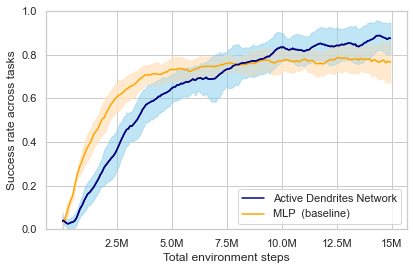

In [4]:
# PLOT ACCURACY CURVES

from scipy.interpolate import make_interp_spline

fig, ax = plt.subplots()
x = np.array([_ for _ in range(5000, 14955001, 50000)])

### Dendrites curve ###

xy_spline = make_interp_spline(x, dendrites)
x_ = np.linspace(x.min(), x.max(), 1000)
dendrites_ = xy_spline(x_)

x_error_spline = make_interp_spline(x, dendrites_se)
dendrites_se_ = x_error_spline(x_)

###    MLP curve    ###

xy_spline = make_interp_spline(x, mlp)
mlp_ = xy_spline(x_)

x_error_spline = make_interp_spline(x, mlp_se)
mlp_se_ = x_error_spline(x_)

#######################


x_ticks = []
for ind in range(1, len(x)):
    if ind % 50 == 0:
        x_ticks.append(x[ind])
x_ticks.append(15005000)

x_labels = ["2.5M", "5.0M", "7.5M", "10.0M", "12.5M", "15M"]

# Plot Active Dendrites Network
ax.plot(x_, dendrites_, '-', c="navy", label="Active Dendrites Network")
ax.fill_between(x_, dendrites_ - dendrites_se_, dendrites_ + dendrites_se_,
                color="skyblue", alpha=0.3)

# Plot MLP
ax.plot(x_, mlp_, '-', c="orange", label="MLP  (baseline)")
ax.fill_between(x_, mlp_ - mlp_se_, mlp_ + mlp_se_, color="bisque", alpha=0.8)

# Plot Active Dendrites Network again so that 1) it appears first on legend and 2) it is
# plotted in front of MLP curve
ax.plot(x_, dendrites_, '-', c="navy", label=None)
ax.fill_between(x_, dendrites_ - dendrites_se_, dendrites_ + dendrites_se_,
                color="skyblue", alpha=0.3)

ax.set_ylabel('Success rate across tasks')
ax.set_xlabel('Total environment steps')

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
ax.legend(loc="lower right")

ax.set_ylim([0.0, 1.0])

plt.tight_layout()
plt.show()

**PART 2/3:** Average best success rates over multiple seeds (where a single seed yields different success rates across different trials)

In [5]:
# READ FILES + COMPUTE MOVING AVERAGE

# This part reuses code from part 1; we don't redefine variables that take on the same
# values

filename = "data_for_plots_2.p"

with open(filename, "rb") as f:
    data = pickle.load(f)

num_runs = data.shape[0]

# Dict to store all results to plot
runs = {"mlp": [], "dendrites": []}

window_size = 10  # This corresponds to 500K environment steps

# For each 'best run' (specified by the indices used for iterating), get success rates
# at each environment step and compute moving average
for i in [2, 7, 11, 16, 21, 29, 31, 38, 41, 47]:

    if "Dendrite" in data["net_type"][i]:
        runs["dendrites"].append(
            moving_avg(data["Average_fullhist"][i], window_size)
        )
    else:
        runs["mlp"].append(
            moving_avg(data["Average_fullhist"][i], window_size)
        )

# Compute average success rates, and standard deviations for each model
mlp = np.array([np.array(exp) for exp in runs["mlp"]])
mlp_se = np.std(mlp, axis=0)
mlp = np.mean(mlp, axis=0)

dendrites = np.array([np.array(exp) for exp in runs["dendrites"]])
dendrites_se = np.std(dendrites, axis=0)
dendrites = np.mean(dendrites, axis=0)

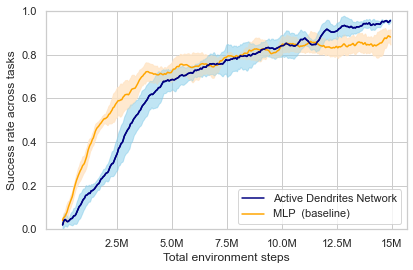

In [6]:
# PLOT ACCURACY CURVES

fig, ax = plt.subplots()

### Dendrites curve ###

xy_spline = make_interp_spline(x, dendrites)
dendrites_ = xy_spline(x_)

x_error_spline = make_interp_spline(x, dendrites_se)
dendrites_se_ = x_error_spline(x_)

###    MLP curve    ###

xy_spline = make_interp_spline(x, mlp)
mlp_ = xy_spline(x_)

x_error_spline = make_interp_spline(x, mlp_se)
mlp_se_ = x_error_spline(x_)

#######################


x_ticks = []
for ind in range(1, len(x)):
    if ind % 50 == 0:
        x_ticks.append(x[ind])
x_ticks.append(15005000)

x_labels = ["2.5M", "5.0M", "7.5M", "10.0M", "12.5M", "15M"]

# Plot Active Dendrites Network
ax.plot(x_, dendrites_, '-', c="navy", label="Active Dendrites Network")
ax.fill_between(x_, dendrites_ - dendrites_se_, dendrites_ + dendrites_se_,
                color="skyblue", alpha=0.3)

# Plot MLP
ax.plot(x_, mlp_, '-', c="orange", label="MLP  (baseline)")
ax.fill_between(x_, mlp_ - mlp_se_, mlp_ + mlp_se_, color="bisque", alpha=0.8)

# Plot Active Dendrites Network again so that 1) it appears first on legend and 2) it is
# plotted in front of MLP curve
ax.plot(x_, dendrites_, '-', c="navy", label=None)
ax.fill_between(x_, dendrites_ - dendrites_se_, dendrites_ + dendrites_se_,
                color="skyblue", alpha=0.3)

ax.set_ylabel('Success rate across tasks')
ax.set_xlabel('Total environment steps')

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
ax.legend(loc="lower right")

ax.set_ylim([0.0, 1.0])

plt.tight_layout()
plt.show()

**PART 3/3:** Box plots which show the success rate for each individual task in MT10

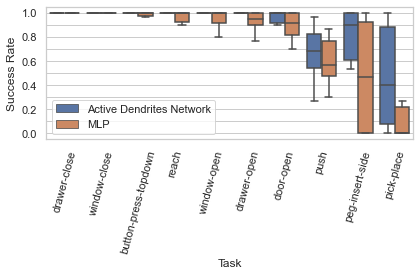

In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid")

task_names = ["drawer-close", "window-close", "button-press-topdown", "reach",
              "window-open", "drawer-open", "door-open", "push", "peg-insert-side",
              "pick-place"]

# --------------------------------- Load & read files ------------------------------- #

filename = "data_for_plots_1_and_3.p"
with open(filename, "rb") as f:
    data = pickle.load(f)


# Read results from individual runs
tasks = []
success_rate = []
hue = []

num_runs = data.shape[0]

for i in range(num_runs):
    for j, task_name in enumerate(task_names):

        tasks.append(j)
        success_rate.append(data[task_name + "-v2"][i])
        hue.append(data["net_type"][i])

# Change labels to "Active Dendrites Network" and "MLP"
for i in range(len(hue)):
    if "Dendrite" in hue[i]:
        hue[i] = "Active Dendrites Network"

# Reverse lists only because we want "Active Dendrites Network" to be plotted before
# "MLP"
tasks.reverse()
success_rate.reverse()
hue.reverse()

# ------------------------------------ Box plots ------------------------------------ #

ax = sns.boxplot(x=tasks, y=success_rate, hue=hue, fliersize=0)  # `fliersize` controls
                                                                 # the size of the
                                                                 # outliers; set to 0
                                                                 # to omit showing
                                                                 # outliers

ax.legend(loc="lower left")
ax.set_xticklabels(task_names, rotation=75)
ax.set_xlabel("Task")

ax.set_yticks(np.arange(0.0, 1.1, 0.1))
ax.set_yticklabels(["0.0", "", "0.2", "", "0.4", "", "0.6", "", "0.8", "", "1.0"])
ax.set_ylabel("Success Rate")

plt.tight_layout()
plt.show()